<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITx%2018.6501x/Notebooks/Stats_w6_PART_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Maximum Likelihood Estimation

In [ ]:
library(tidyverse)

#### EDA Practice

Data: https://www.kaggle.com/c/titanic/data


1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each Pclass?
4. Did any reverends survive? How many?
5. What is the survival rate for people whose Age is empty?
What is the survival rate for each port of embarkation?
6. What is the survival rate for children (under 12) in each Pclass?
7. Of all the people that died, who had the most expensive ticket? How much did it cost?
8. Does having family on the boat help or hurt your chances of survival?

In [ ]:
titanic <- read_csv("train.csv")
head(titanic)

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [ ]:
# What was the survival rate overall?
overall_survival_rate <- mean(titanic$Survived) * 100
cat("Survival rate overall: ", overall_survival_rate, "%\n")

Survival rate overall:  38.38384 %


In [ ]:
#Which gender fared the worst? What was their survival rate?
gender_survival <- titanic %>%
  group_by(Sex) %>%
  summarize(survived = sum(Survived), survival_rate = mean(Survived) * 100)

print(gender_survival)

# A tibble: 2 × 3
  Sex    survived survival_rate
  <chr>     <dbl>         <dbl>
1 female      233          74.2
2 male        109          18.9


In [ ]:
#What was the survival rate for each Pclass?
pclass_survival <- titanic %>%
  group_by(Pclass) %>%
  summarize(survival_rate = mean(Survived) * 100)
print(pclass_survival)

# A tibble: 3 × 2
  Pclass survival_rate
   <dbl>         <dbl>
1      1          63.0
2      2          47.3
3      3          24.2


#### Functions in R

In [ ]:
f <- function(x){
  output <- x^2
  return(output)
}

In [ ]:
f(8)

[1] 64

In [ ]:
#like linspace numpy , from start to end with increment
x <- seq(-2, 2, 0.2)

- $f(x) = x^2$
- $g(x) = sin(x)$

In [ ]:
f(x)

[1] 4.00 3.24 2.56 1.96 1.44 1.00 0.64 0.36 0.16 0.04 0.00 0.04 0.16 0.36 0.64
[16] 1.00 1.44 1.96 2.56 3.24 4.00

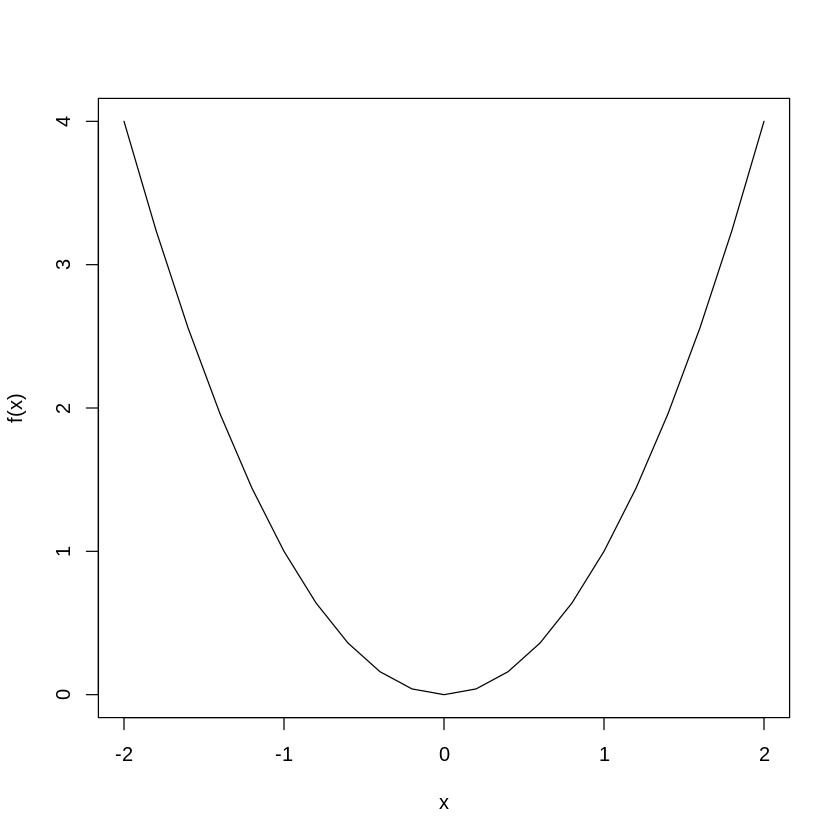

In [ ]:
plot(x, f(x), type = 'l')

In [ ]:
sin_function <- function(x) {
  sin(x)
}

In [ ]:
x <- seq(-2 * pi, 2 * pi, length.out = 100)

In [ ]:
y <- sin_function(x)

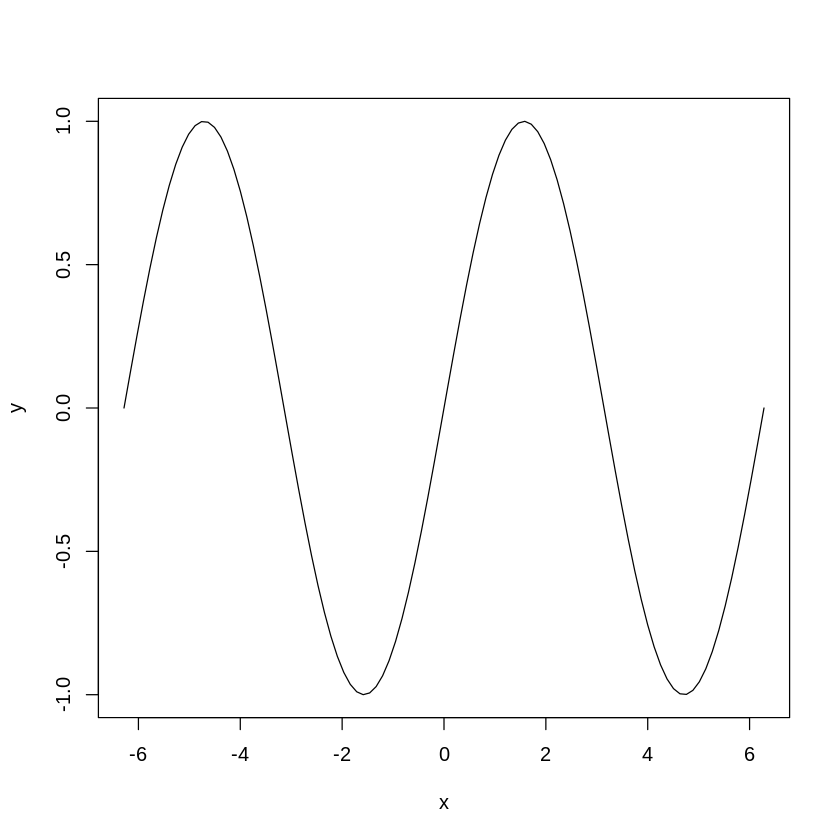

In [ ]:
plot(x, y , type = 'l')

In [ ]:
f <- function(x){
  output <- x^2
  return(output)
}

In [ ]:
x <-seq(-2, 2, 0.1)

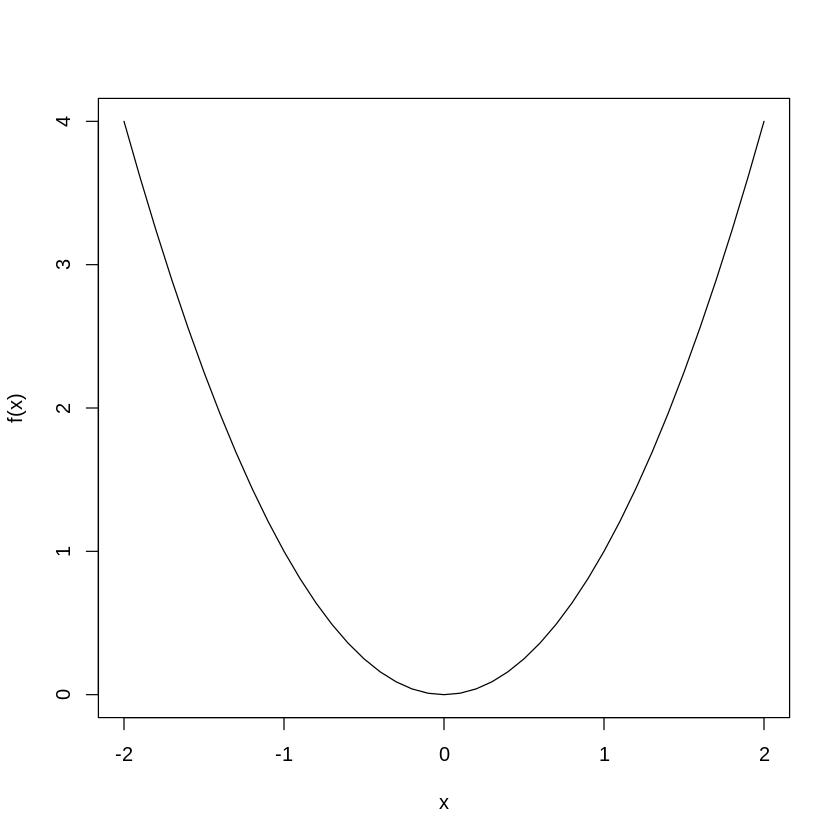

In [ ]:
plot (x, f(x), type='l')

In [ ]:
# give it function to get you the max and the min
optim(par = 1, fn = f)

Warning message in optim(par = 1, fn = f):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] -8.881784e-16

$value
[1] 7.888609e-31

$counts
function gradient 
      32       NA 

$convergence
[1] 0

$message
NULL

In [ ]:
f <- function (x) {

  return (-(x - 2)^2+4)
}

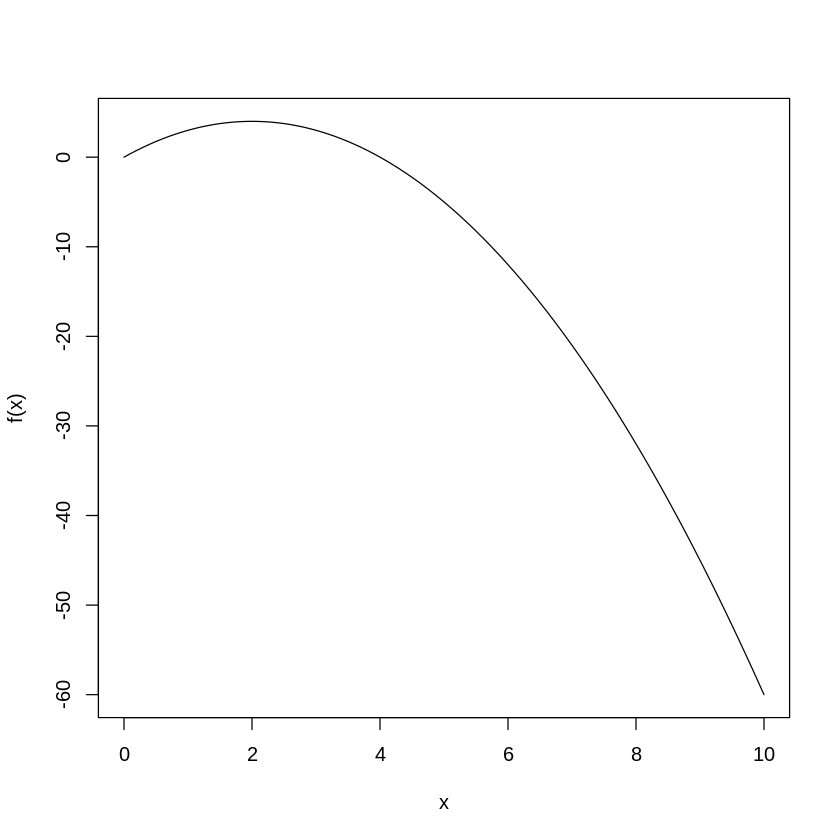

In [ ]:
x <- seq(0, 10, 0.1)
plot(x, f(x), type = 'l')

In [ ]:
optimize(f, c(0,4), maximum = TRUE)

$maximum
[1] 2

$objective
[1] 4

In [ ]:
f2 <- function(x){

  return (-f(x))
}

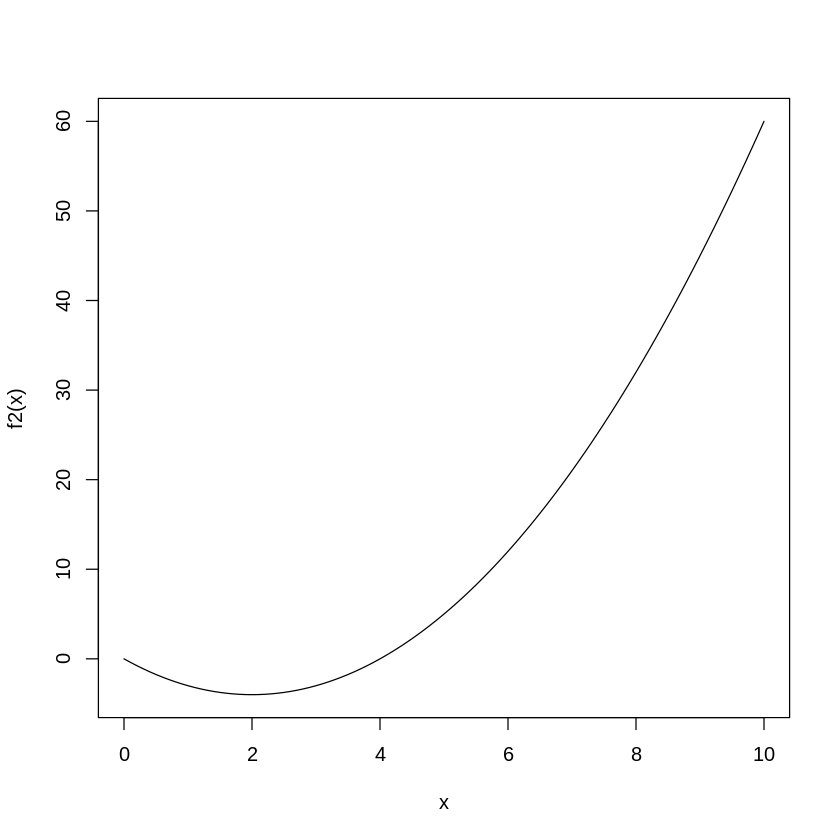

In [ ]:
plot(x, f2(x), type = 'l')

In [ ]:
optim(par = 10, fn = f2)

Warning message in optim(par = 10, fn = f2):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 2

$value
[1] -4

$counts
function gradient 
      32       NA 

$convergence
[1] 0

$message
NULL

#### Likelihood

In [ ]:
# reminder of binomial dist


In [ ]:
x <-seq(0,20,1)
y <- dbinom(x , size=20, p = 0.5)

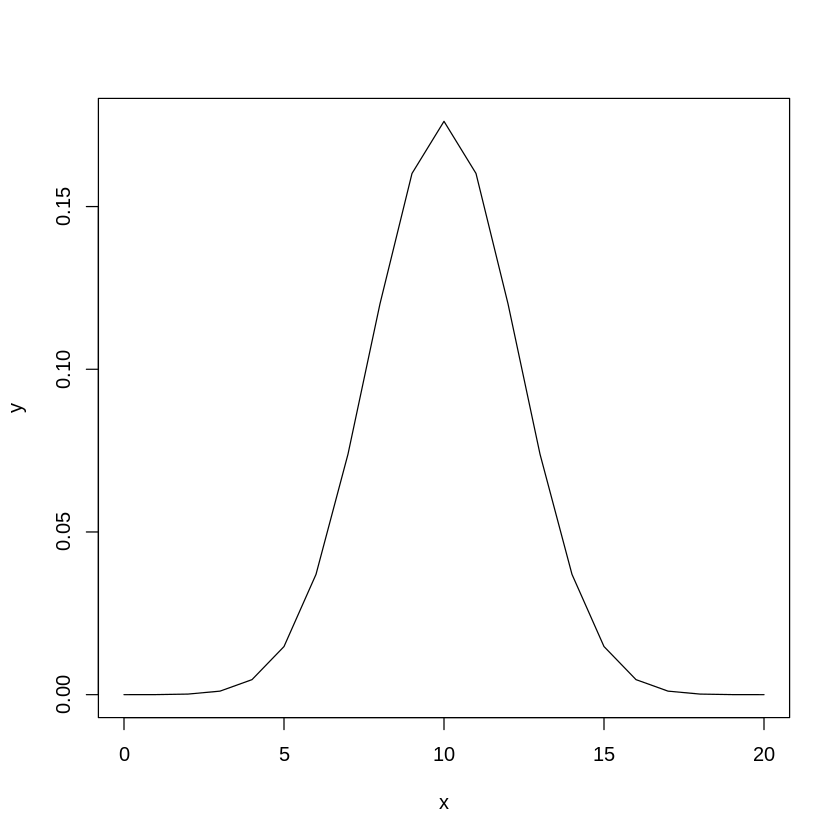

In [ ]:
plot(x, y, type = 'l')

#### Likelihood function

In [ ]:
x <-c(12, 13)
y <- dbinom(x , size=20, p = 0.5)
y

[1] 0.12013435 0.07392883

In [ ]:
y <- dbinom(x , size=20, p = 0.6)
y
# WE NEED TO KNOW WHAT IS THE RIGHT PARAMETER FOR THE RIGHT DATA

[1] 0.1797058 0.1658823

In [ ]:
NGE_LOG_LIK <- function(data, p){
  return (-log(dbinom(data , size=20, prob= p)))
}

In [ ]:
optim(par = 0.5, fn = NGE_LOG_LIK, data = 3 )

Warning message in optim(par = 0.5, fn = NGE_LOG_LIK, data = 3):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”
Warning message in dbinom(data, size = 20, prob = p):
“NaNs produced”


$par
[1] 0.15

$value
[1] 1.415398

$counts
function gradient 
      32       NA 

$convergence
[1] 0

$message
NULL

#### Normal Distribution

In [ ]:
#given input it gives probapility , this has two parameters mean and stand ved

?dnorm

In [ ]:
negative_log_normal <- function(data, params){
  return(-sum(log(dnorm(data, mean = params[1], sd = params[2]))))
}

In [ ]:
Ssample_data <- rnorm(200)
sample_data

#### Optimizer

In [ ]:
optim(par = c(0, 1), fn = negative_log_normal, data = sample_data)

ERROR: ignored